# Imersão Dados - Aula 1: Introdução

<p>Olá!!! Bem-vindos ao meu notebook da Imersão dados da Alura. Essa iniciative é fantástica para trazer a ciência de dados a profissionais de outras àreas.</p>
<p>O intuito desse notebook é "traduzir" os códigos, transformações de dados e visualizações do <code>python</code> para <code>R</code></p>

## O Problema
<p>O problema que vamos investigar é a precificação de imóveis a partir de dados provenientes de uma base de dados. Teremos várias características dos imóveis (área, número de cômodos, localização), essas serão nossas <strong>features</strong>, ou variáveis que serão usadas para fazermos a previsão. O preço dos imóveis será o nosso <strong>target</strong>, ou seja, a resposta que desejamos que o modelo seja capaz de estimar. Como a resposta será contínua (isto é, o preço pode variar de 0 reais a Infinito), trata-se de um problema de <strong>regressão</strong>.</p>

<p>Para começar a manipular os dados e resolver o problema, precisamos, claro, importá-los</p>

In [1]:
library(tidyverse) #carrega a biblioteca do tidyverse, a biblia da manipulacao e visualizacao de dados em R

dados <- read_csv("https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv")
glimpse(dados) #visualizar a estrutura dos dados

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Rows: 10008 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): Rua, Bairro, Cidade, Valor
dbl (4): Metragem, Quartos, Banheiros, Vagas

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 10,008
Columns: 8
$ Rua       <chr> "Avenida Itacira, 255", "Rua Aurelia Perez Alvarez, 42", "Ru…
$ Bairro    <chr> "Planalto Paulista", "Jardim dos Estados", "Jardim Reimberg"…
$ Cidade    <chr> "São Paulo", "São Paulo", "São Paulo", "São Paulo", "São Pau…
$ Metragem  <dbl> 1000, 496, 125, 310, 100, 440, 145, 150, 48, 114, 261, 436, …
$ Quartos   <dbl> 4, 4, 4, 3, 3, 4, 4, 2, 2, 3, 4, 4, 3, 3, 4, 3, 4, 3, 7, 3, …
$ Banheiros <dbl> 8, 4, 3, 2, 2, 4, 4, 2, 1, 3, 4, 3, 3, 5, 5, 3, 2, 5, 7, 3, …
$ Vagas     <dbl> 6, 4, 2, 4, 2, 6, 2, 2, 1, 2, 3, 3, 2, 4, 4, 2, 4, 4, 6, 4, …
$ Valor     <chr> "R$ 7.000.000", "R$ 3.700.000", "R$ 380.000", "R$ 685.000", …


<p>Temos 8 variáveis diferentes nesse dataset:</p>
<table>
<tr>
    <th>Variável</th>
    <th>Tipo Atual</th>
    <th>Tipo Correto</th>
</tr>
<tr>
    <td>Rua</td>
    <td>Caracter</td>
    <td>Caracter</td>
</tr>
<tr>
    <td>Bairro</td>
    <td>Caracter</td>
    <td>Caracter</td>
</tr>
<tr>
    <td>Cidade</td>
    <td>Caracter</td>
    <td>Caracter</td>
</tr>
<tr>
    <td>Metragem</td>
    <td>double</td>
    <td>double</td>
</tr>
<tr>
    <td>Quartos</td>
    <td>double</td>
    <td>int</td>
</tr>
<tr>
    <td>Banheiros</td>
    <td>double</td>
    <td>int</td>
</tr>
<tr>
    <td>Vagas</td>
    <td>double</td>
    <td>int</td>
</tr>
<tr>
    <td>Valor</td>
    <td>Caracter</td>
    <td>double</td>
</tr>
</table>

Logo de cara já aparecem alguns problemas:
1. O número de quartos, vagas e banheiros deve ser sempre um número inteiro (e não negativo)
2. O Valor está formatado como texto devido ao "R$" que o precede

Mais a frente podemos cogitar modelar a cidade como um fator para determinar sua influência no preço final do imóvel, mas para isso é necessário que haja um número relevante de casos por cidade.

In [2]:
#Consertando as classes das variáveis
dados <- dados %>% 
            mutate(across(Quartos:Vagas, as.integer))

#Carregar biblioteca para manipulacao de strings
library(stringr)
dados$Valor <- str_remove_all(dados$Valor, "R\\$ ") %>% #necessario escapar o $ por ser um caracter especial
                str_remove_all("\\.") %>%
                as.numeric()

#Verificando a estrutura novamente
glimpse(dados)

Warning message in str_remove_all(dados$Valor, "R\\$ ") %>% str_remove_all("\\.") %>% :
“NAs introduced by coercion”


Rows: 10,008
Columns: 8
$ Rua       <chr> "Avenida Itacira, 255", "Rua Aurelia Perez Alvarez, 42", "Ru…
$ Bairro    <chr> "Planalto Paulista", "Jardim dos Estados", "Jardim Reimberg"…
$ Cidade    <chr> "São Paulo", "São Paulo", "São Paulo", "São Paulo", "São Pau…
$ Metragem  <dbl> 1000, 496, 125, 310, 100, 440, 145, 150, 48, 114, 261, 436, …
$ Quartos   <int> 4, 4, 4, 3, 3, 4, 4, 2, 2, 3, 4, 4, 3, 3, 4, 3, 4, 3, 7, 3, …
$ Banheiros <int> 8, 4, 3, 2, 2, 4, 4, 2, 1, 3, 4, 3, 3, 5, 5, 3, 2, 5, 7, 3, …
$ Vagas     <int> 6, 4, 2, 4, 2, 6, 2, 2, 1, 2, 3, 3, 2, 4, 4, 2, 4, 4, 6, 4, …
$ Valor     <dbl> 7000000, 3700000, 380000, 685000, 540000, 1980000, 850000, 4…


Vemos que foram introduzidos alguns ``NA``, que é o tipo de dado faltante em R, onde existiam outros caracteres além do R$ e dos pontos. Essas observações tinham valores de alugéis, e por isso devemos deacartá-las.

In [3]:
dados_limpo <- dados %>%
            drop_na(Valor)
    paste0("Foram removidas ", nrow(dados)-nrow(dados_limpo)," linhas" )

[1] "Foram removidas 852 linhas"

## Desafios

><strong>Desafios desta aula</strong><br>
1 - Realizar a média da metragem para cada um dos bairros. (Proposto pelo Paulo)<br>
2 - Duas formas de selecionar os dados por bairro (consultar os métodos na documentação do Pandas) (Proposto pelo Thiago)<br>
3 - Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, assim como tentar colocar alguma conclusão. (Proposto pelo Thiago)<br>
4 - Pegar outras estatísticas dos dados (como média, mediana, mim, max). (Proposto pela Vivian)<br>
5 - Descobrir quais são os bairros que não tem nome de rua. (Proposto pela Vivian)<br>

In [4]:
#Desafio 1: Media por bairro
dados_limpo %>% 
    group_by(Bairro) %>%
    summarize(Media_m2 = mean(Metragem))

Bairro,Media_m2
<chr>,<dbl>
Aclimação,246.1646
Água Branca,173.5833
Água Fria,165.4167
Água Funda,139.0000
Água Rasa,186.1667
Alto da Boa Vista,418.8750
Alto da Lapa,299.2500
Alto da Mooca,270.0500
Alto de Pinheiros,429.8537


In [5]:
#Desafio 2: Selecionar os dados por bairro
filter(dados_limpo, Bairro == "Vila Mariana")

#ou

subset(dados_limpo, Bairro == "Vila Mariana")

Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<dbl>
Rua Pero Correia,Vila Mariana,São Paulo,250,3,3,1,1350000
Praça Doutor Carvalho Franco,Vila Mariana,São Paulo,250,3,5,2,2450000
Rua Professor João Marinho,Vila Mariana,São Paulo,170,3,4,2,1490000
NA,Vila Mariana,São Paulo,228,4,5,3,2200000
"Rua Pero Correia, 892",Vila Mariana,São Paulo,350,6,4,10,1700000
"Rua Potenji, 437",Vila Mariana,São Paulo,280,3,2,2,1950000
"Rua Potenji, 437",Vila Mariana,São Paulo,285,3,2,2,1950000
Rua Brás Lourenço,Vila Mariana,São Paulo,190,4,3,2,800000
"Rua Dona Inácia Uchôa, 40",Vila Mariana,São Paulo,154,3,2,2,850000


Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<dbl>
Rua Pero Correia,Vila Mariana,São Paulo,250,3,3,1,1350000
Praça Doutor Carvalho Franco,Vila Mariana,São Paulo,250,3,5,2,2450000
Rua Professor João Marinho,Vila Mariana,São Paulo,170,3,4,2,1490000
NA,Vila Mariana,São Paulo,228,4,5,3,2200000
"Rua Pero Correia, 892",Vila Mariana,São Paulo,350,6,4,10,1700000
"Rua Potenji, 437",Vila Mariana,São Paulo,280,3,2,2,1950000
"Rua Potenji, 437",Vila Mariana,São Paulo,285,3,2,2,1950000
Rua Brás Lourenço,Vila Mariana,São Paulo,190,4,3,2,800000
"Rua Dona Inácia Uchôa, 40",Vila Mariana,São Paulo,154,3,2,2,850000


`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



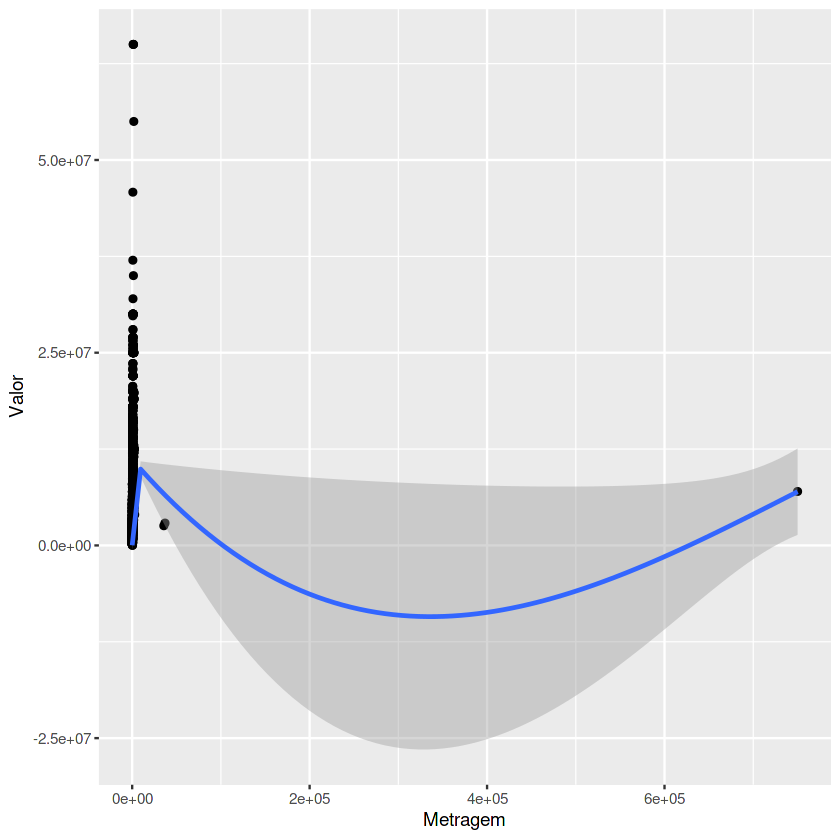

In [6]:
#Desafio 3: Graficos Exploratorios

#Relacao entre metragem e valor
dados_limpo %>%
    ggplot(aes(Metragem, Valor))+
    geom_point()+ #desenha os pontos
    geom_smooth() -> p #adiciona uma linha de tendencia e salva em uma variavel p
p

<p>Percebemos um problema clássico, a variação no eixo y é muito maior do que no eixo x. Para uma visualização mais adequada, podemos usar uma transformação logaritmica da escala do eixo y</p>

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



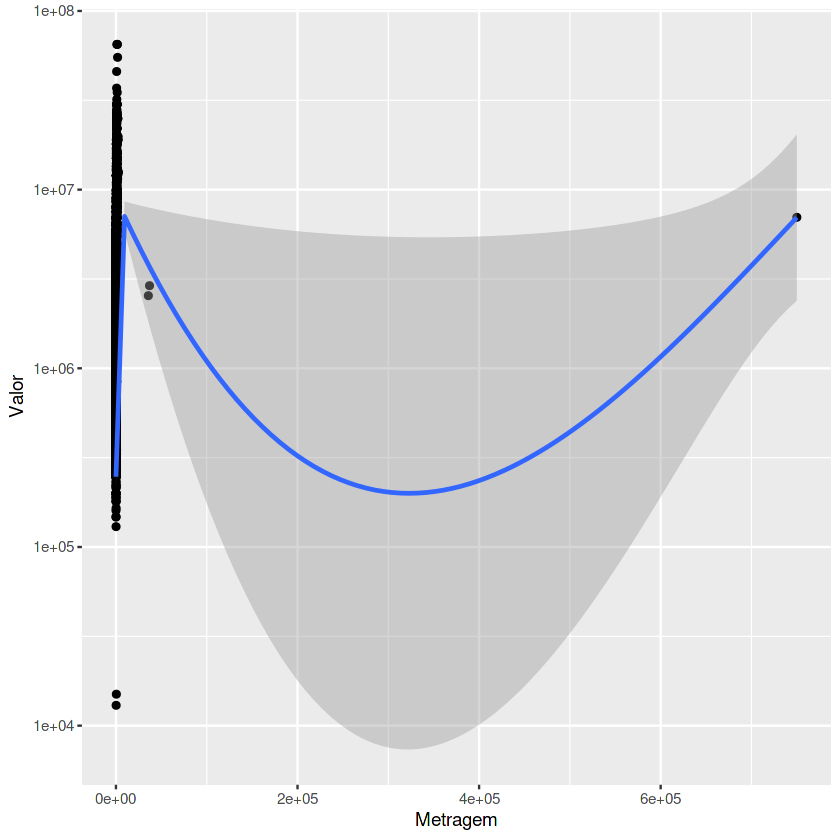

In [7]:
p+scale_y_log10()

<p>Ainda impossível de entender, precisamos filtrar os valor extremos</p>

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



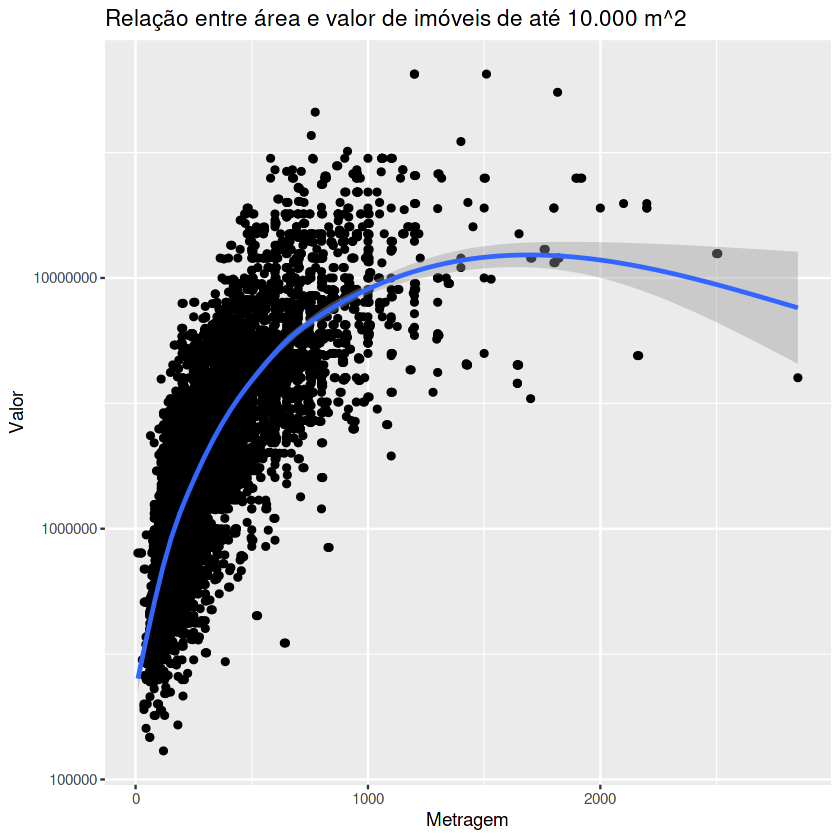

In [8]:
options(scipen = 999)
dados_limpo %>%
        filter(Valor >= 10^5, Metragem < 10^4 ) %>%
        ggplot(aes(Metragem, Valor))+
        geom_point()+
        geom_smooth()+
        scale_y_log10()+
        ggtitle("Relação entre área e valor de imóveis de até 10.000 m^2")

<p>Agora podemos perceber que a maioria dos imóveis têm entre 0 e 1000 m^2, e nesse intervalo temos uma correlação entre preço e área.</p>

In [9]:
#4 - Pegar outras estatísticas dos dados (como média, mediana, mim, max)
summary(dados_limpo[4:8])

    Metragem           Quartos         Banheiros          Vagas      
 Min.   :    10.0   Min.   : 1.000   Min.   : 1.000   Min.   : 1.00  
 1st Qu.:   168.0   1st Qu.: 3.000   1st Qu.: 2.000   1st Qu.: 2.00  
 Median :   276.0   Median : 3.000   Median : 4.000   Median : 4.00  
 Mean   :   434.4   Mean   : 3.447   Mean   : 3.797   Mean   : 3.96  
 3rd Qu.:   450.0   3rd Qu.: 4.000   3rd Qu.: 5.000   3rd Qu.: 5.00  
 Max.   :750000.0   Max.   :16.000   Max.   :40.000   Max.   :50.00  
     Valor         
 Min.   :   13000  
 1st Qu.:  890000  
 Median : 1800000  
 Mean   : 3052203  
 3rd Qu.: 3500000  
 Max.   :65000000  

In [10]:
#5 - Descobrir quais são os bairros que não tem nome de rua
dados_limpo %>%
    filter(is.na(Rua))%>%
    group_by(Bairro)%>%
    summarize(n_de_ruas_faltantes = n())%>%
    arrange(desc(n_de_ruas_faltantes))

Bairro,n_de_ruas_faltantes
<chr>,<int>
Jardim Guedala,156
Alto de Pinheiros,151
Jardim Paulista,126
Jardim Europa,107
Jardim Leonor,107
Cidade Jardim,96
Morumbi,77
Vila Madalena,69
Brooklin Paulista,66


# Aula 2 - Tratamento de dados e primeiros gráficos

Nessa aula continuamos trabalhando com os dados de imóveis em São Paulo.<br>
Nosso objetivo é entender a relação entre as variávei explanatórias e nossa variável de resposta, o valor do imóvel.

## Desafios
1. Criar uma escala de valores em milhões.
1. Deixar o gráfico do histograma de valores legível (alterar labels, cores, título, escala).
1. Preço do metro quadrado por bairro e plotar em um gráfico ideal.
1. Explorar as bibliotecas de visualizações e colocar as suas conclusões.
1. Pesquisar um visualização para analisar os quartis, mediana e outliers.

### 1 - Criar uma escala de valores em milhões e 2 - Deixar o gráfico do histograma de valores legível (alterar labels, cores, título, escala).


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



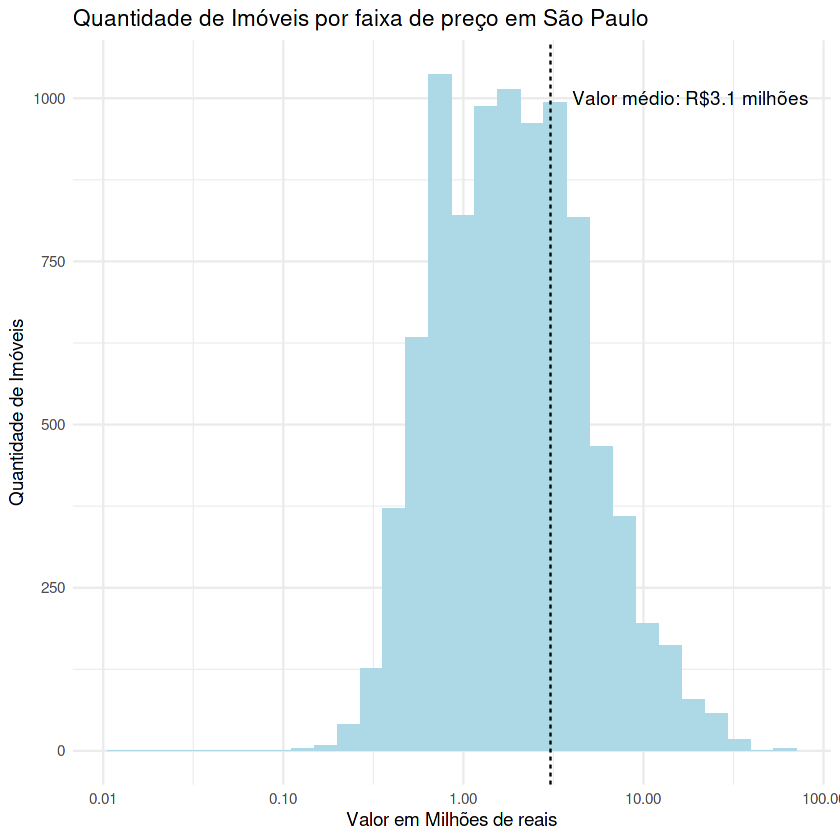

In [11]:
dados_limpo %>%
    ggplot(aes(Valor/10^6))+
    geom_histogram(fill = "light blue")+
    xlab("Valor em Milhões de reais")+
    ylab("Quantidade de Imóveis")+
    geom_vline(xintercept = mean(dados_limpo$Valor/10^6), linetype = "dashed")+
    annotate(geom = "text", label = paste0("Valor médio: R$",round(mean(dados_limpo$Valor/10^6),1)," milhões"),
             x = mean(dados_limpo$Valor/10^6)+15, y = 1000)+
    scale_x_log10(labels = scales::label_number())+
    ggtitle("Quantidade de Imóveis por faixa de preço em São Paulo")+
    theme_minimal()

### 3 - Preço do metro quadrado por bairro e plotar em um gráfico ideal.

In [12]:
#Calcular preço por metro quadrado
dados_limpo <- dados_limpo %>%
                    mutate(preco_por_m2 = Valor/Metragem)
head(dados_limpo)

Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,preco_por_m2
<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>
"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000,7000.000
"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000,7459.677
Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000,3040.000
NA,Jardim Morumbi,São Paulo,310,3,2,4,685000,2209.677
"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000,5400.000
Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,1980000,4500.000


Para calcular o preço por bairro, podemos agrupar os dados por bairro antes e aplicar uma média depois

In [13]:
dados_limpo %>%
    group_by(Bairro)%>%
    summarize(media_preco_m2 = mean(preco_por_m2))

Bairro,media_preco_m2
<chr>,<dbl>
Aclimação,7656.169
Água Branca,7269.114
Água Fria,5841.104
Água Funda,3876.863
Água Rasa,4509.608
Alto da Boa Vista,5849.569
Alto da Lapa,7606.728
Alto da Mooca,5691.740
Alto de Pinheiros,11269.980


Percebemos que são muitos bairros únicos, o que pode dificultar a visualização

In [14]:
length(unique(dados_limpo$Bairro)) #Verificar quantos bairros únicos

[1] 698

Existem 698 bairros únicos, ou seja, a opção de pequenos múltiplos, plotando gráficos separados lado a lado para cada bairro, é inviável.
Podemos definir os bairros mais comuns e agrupar o restante em uma categoria "outros"

In [15]:
dados_limpo %>%
    group_by(Bairro)%>% #agrupa por bairro
    tally()%>% #conta quantos imóveis cada bairro possui
    arrange(desc(n))%>% #ordena de forma decrescente
    head(9) -> top_9 #seleciona os 9 primeiros e salva em uma variavel

top_9

Bairro,n
<chr>,<int>
Alto de Pinheiros,369
Jardim Guedala,353
Jardim Paulista,266
Brooklin Paulista,224
Jardim Europa,210
Pacaembu,200
Vila Madalena,198
Cidade Jardim,191
Planalto Paulista,184


Dessa forma, podemos usar essa relação para estabelecer um corte. Usaremos 184 como corte, e bairros com menos imóveis serão agrupados. Assim, consequimos uma visualização eficaz.

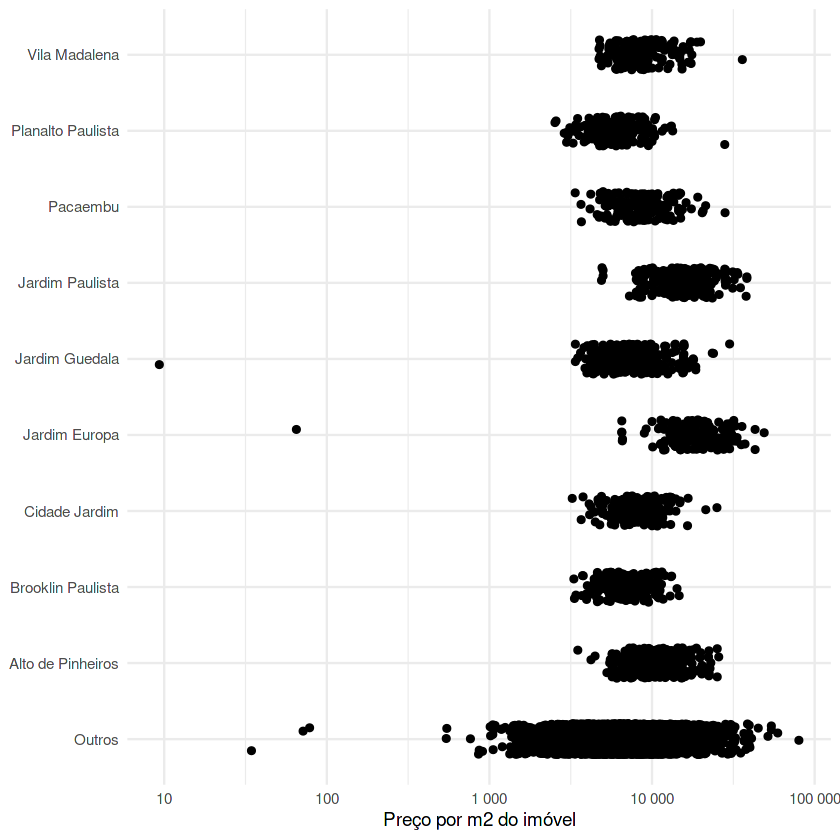

In [16]:
dados_limpo %>%
    mutate(bairro_resumido = ifelse(dados_limpo$Bairro %in% top_9$Bairro, dados_limpo$Bairro, " Outros")) %>%
    ggplot(aes(preco_por_m2, bairro_resumido))+
    geom_jitter(width = 0, height = .2)+
    scale_x_log10(labels = scales::label_number())+
    theme_minimal()+
    ylab(NULL)+
    xlab("Preço por m2 do imóvel")

### 5 - Pesquisar um visualização para analisar os quartis, mediana e outliers.¶

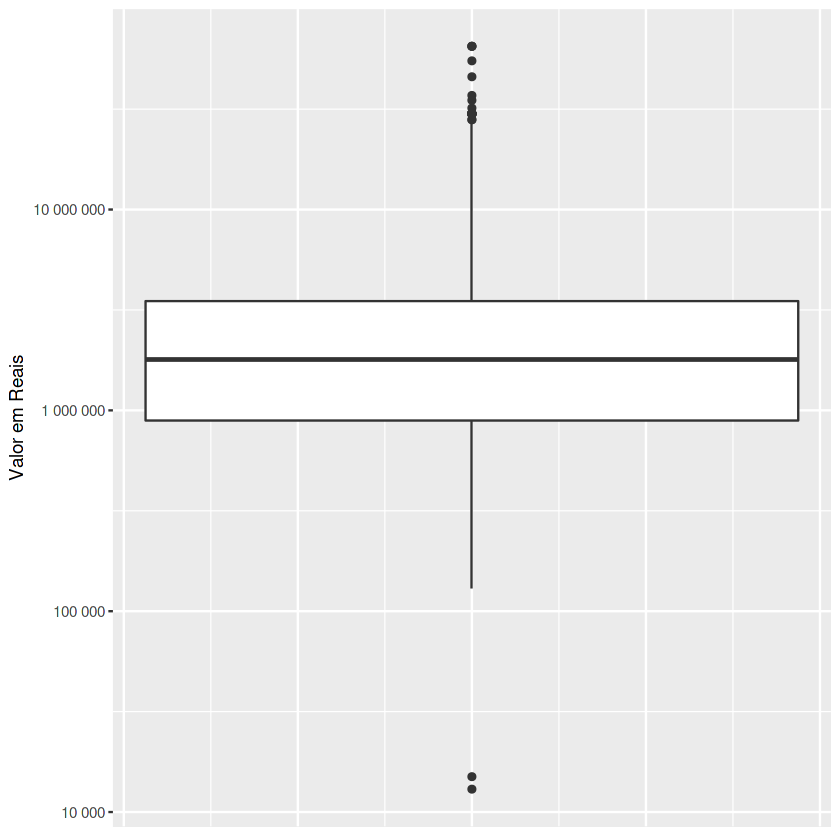

In [17]:
dados_limpo %>%
    ggplot(aes(y = Valor))+
    geom_boxplot()+
    scale_y_log10(labels = scales::label_number())+
    theme(axis.text.x = element_blank(),
        axis.ticks.x = element_blank())+
    ylab("Valor em Reais")

# Aula 3 - Gráficos, Time Series e Análise Exploratória

Nessa aula usamos dados externos para adicionar outras variáveis que podem ser úteis para prever o preço de um imóvel, como dados socioecoômicos do IBGE.

### Desafios desta aula
1. Tentar vincular dados do IBGE com os dados de imóveis.
1. Tratar os outliers e comparar com os resultados.
1. Agrupar por mais de uma categoria e realizar as análises.
1. Organize o colab para deixar com cara de projeto.

### 1 - Vincular os dados do IBGE aos dados dos imóveis

In [18]:
dados_ibge <- read_csv("https://gist.githubusercontent.com/Felipe-Furtado/86c7cf4f801f1811114b6fec8c43f3b5/raw/611b458242910b9479587e3b40d9126aad2a7e1d/dados_vendas_censo.csv")
glimpse(dados_ibge)

Rows: 5605 Columns: 51
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (15): Rua, Bairro, Cidade, Valor, rua, Point, Nome_Grande_Regiao, Nome_d...
dbl (35): Metragem, Quartos, Banheiros, Vagas, Valor_anuncio, Valor_mm, Valo...
lgl  (1): Tipo_anuncio

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 5,605
Columns: 51
$ Rua                     <chr> "Avenida Itacira, 255", "Rua Aurelia Perez Alv…
$ Bairro                  <chr> "Planalto Paulista", "Jardim dos Estados", "Ja…
$ Cidade                  <chr> "São Paulo", "São Paulo", "São Paulo", "São Pa…
$ Metragem                <dbl> 1000, 496, 125, 100, 440, 145, 150, 48, 114, 2…
$ Quartos                 <dbl> 4, 4, 4, 3, 4, 4, 2, 2, 3, 4, 3, 3, 4, 3, 4, 3…
$ Banheiros               <dbl> 8, 4, 3, 2, 4, 4, 2, 1, 3, 4, 3, 5, 5, 3, 2, 5…
$ Vagas                   <dbl> 6, 4, 2, 2, 6, 2, 2, 1, 2, 3, 2, 4, 4, 2, 4, 4…
$ Valor                   <chr> "R$ 7.000.000", "R$ 3.700.000", "R$ 380.000", …
$ Valor_anuncio           <dbl> 7000000, 3700000, 380000, 540000, 1980000, 850…
$ Tipo_anuncio            <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ Valor_mm                <dbl> 7.0000, 3.7000, 0.3800, 0.5400, 1.9800, 0.8500…
$ Valor_m2                <dbl> 7000.000, 7459.677, 3040.000, 5400.000, 4500.0…
$ rua           

Como já limpamos os dados anteriormente, vamos dar um inner join dos dados limpos anteriormente com esses novos dados. Vamos concatenar as primeiras colunas para gerar um pseudo-id para o join.

In [19]:
dados_limpo <- dados_limpo %>%
    mutate(pseudo_id = paste(Rua, Bairro, Cidade, Metragem, Quartos, Banheiros, Vagas))

dados_ibge <- dados_ibge %>%
    mutate(pseudo_id = paste(Rua, Bairro, Cidade, Metragem, Quartos, Banheiros, Vagas))

dados_completo <- dados_limpo %>%
    inner_join(dados_ibge, by = "pseudo_id", suffix = c("", "_ibge"))

glimpse(dados_completo)

Rows: 6,042
Columns: 61
$ Rua                     <chr> "Avenida Itacira, 255", "Rua Aurelia Perez Alv…
$ Bairro                  <chr> "Planalto Paulista", "Jardim dos Estados", "Ja…
$ Cidade                  <chr> "São Paulo", "São Paulo", "São Paulo", "São Pa…
$ Metragem                <dbl> 1000, 496, 125, 100, 440, 145, 150, 48, 114, 2…
$ Quartos                 <int> 4, 4, 4, 3, 4, 4, 2, 2, 3, 4, 3, 3, 4, 3, 4, 3…
$ Banheiros               <int> 8, 4, 3, 2, 4, 4, 2, 1, 3, 4, 3, 5, 5, 3, 2, 5…
$ Vagas                   <int> 6, 4, 2, 2, 6, 2, 2, 1, 2, 3, 2, 4, 4, 2, 4, 4…
$ Valor                   <dbl> 7000000, 3700000, 380000, 540000, 1980000, 850…
$ preco_por_m2            <dbl> 7000.000, 7459.677, 3040.000, 5400.000, 4500.0…
$ pseudo_id               <chr> "Avenida Itacira, 255 Planalto Paulista São Pa…
$ Rua_ibge                <chr> "Avenida Itacira, 255", "Rua Aurelia Perez Alv…
$ Bairro_ibge             <chr> "Planalto Paulista", "Jardim dos Estados", "Ja…
$ Cidade_ibge   

Para facilitar a legibilidade e interpretação, vamos manter apenas as colunas relevantes

In [20]:
dados_completo <- dados_completo %>%
    select(Bairro:preco_por_m2, starts_with("V0"))
glimpse(dados_completo)

Rows: 6,042
Columns: 20
$ Bairro       <chr> "Planalto Paulista", "Jardim dos Estados", "Jardim Reimbe…
$ Cidade       <chr> "São Paulo", "São Paulo", "São Paulo", "São Paulo", "São …
$ Metragem     <dbl> 1000, 496, 125, 100, 440, 145, 150, 48, 114, 261, 193, 25…
$ Quartos      <int> 4, 4, 4, 3, 4, 4, 2, 2, 3, 4, 3, 3, 4, 3, 4, 3, 7, 3, 3, …
$ Banheiros    <int> 8, 4, 3, 2, 4, 4, 2, 1, 3, 4, 3, 5, 5, 3, 2, 5, 7, 3, 2, …
$ Vagas        <int> 6, 4, 2, 2, 6, 2, 2, 1, 2, 3, 2, 4, 4, 2, 4, 4, 6, 4, 5, …
$ Valor        <dbl> 7000000, 3700000, 380000, 540000, 1980000, 850000, 450000…
$ preco_por_m2 <dbl> 7000.000, 7459.677, 3040.000, 5400.000, 4500.000, 5862.06…
$ V001         <dbl> 164, 136, 142, 156, 107, 222, 305, 265, 312, 341, 323, 27…
$ V002         <dbl> 437, 425, 493, 468, 376, 654, 984, 702, 906, 936, 706, 77…
$ V003         <dbl> 2.66, 3.13, 3.47, 3.00, 3.51, 2.95, 3.23, 2.65, 2.90, 2.7…
$ V004         <dbl> 2.04, 1.96, 3.06, 1.99, 2.31, 2.18, 2.13, 1.39, 1.55, 2.2…
$ V005         <

Agora vamos usar o dicionário do IBGE para tornar o nome das variáveis por algo inteligível

In [21]:
dados_completo <- 
    dados_completo %>%
        rename(n_domicilios = V001,
              n_moradores = V002,
              media_moradores = V003,
              variancia_moradores = V004,
              rendimento_medio = V005,
              variancia_rendimento_medio = V006,
              rendimento = V007,
              variancia_rendimento = V008) %>%
        select(-starts_with("V0"))

glimpse(dados_completo)

Rows: 6,042
Columns: 16
$ Bairro                     <chr> "Planalto Paulista", "Jardim dos Estados", …
$ Cidade                     <chr> "São Paulo", "São Paulo", "São Paulo", "São…
$ Metragem                   <dbl> 1000, 496, 125, 100, 440, 145, 150, 48, 114…
$ Quartos                    <int> 4, 4, 4, 3, 4, 4, 2, 2, 3, 4, 3, 3, 4, 3, 4…
$ Banheiros                  <int> 8, 4, 3, 2, 4, 4, 2, 1, 3, 4, 3, 5, 5, 3, 2…
$ Vagas                      <int> 6, 4, 2, 2, 6, 2, 2, 1, 2, 3, 2, 4, 4, 2, 4…
$ Valor                      <dbl> 7000000, 3700000, 380000, 540000, 1980000, …
$ preco_por_m2               <dbl> 7000.000, 7459.677, 3040.000, 5400.000, 450…
$ n_domicilios               <dbl> 164, 136, 142, 156, 107, 222, 305, 265, 312…
$ n_moradores                <dbl> 437, 425, 493, 468, 376, 654, 984, 702, 906…
$ media_moradores            <dbl> 2.66, 3.13, 3.47, 3.00, 3.51, 2.95, 3.23, 2…
$ variancia_moradores        <dbl> 2.04, 1.96, 3.06, 1.99, 2.31, 2.18, 2.13, 1…
$ rendimento_med

### 2 - Tratar os outliers e comparar com os resultados


In [22]:
#Sumario dos dados
summary(dados_completo)

    Bairro             Cidade             Metragem          Quartos      
 Length:6042        Length:6042        Min.   :   10.0   Min.   : 1.000  
 Class :character   Class :character   1st Qu.:  160.0   1st Qu.: 3.000  
 Mode  :character   Mode  :character   Median :  255.0   Median : 3.000  
                                       Mean   :  331.8   Mean   : 3.405  
                                       3rd Qu.:  405.0   3rd Qu.: 4.000  
                                       Max.   :37000.0   Max.   :11.000  
                                                                         
   Banheiros          Vagas            Valor           preco_por_m2  
 Min.   : 1.000   Min.   : 1.000   Min.   :   13000   Min.   :   65  
 1st Qu.: 2.000   1st Qu.: 2.000   1st Qu.:  850000   1st Qu.: 4713  
 Median : 3.000   Median : 3.000   Median : 1600000   Median : 6429  
 Mean   : 3.711   Mean   : 3.794   Mean   : 2724848   Mean   : 7713  
 3rd Qu.: 5.000   3rd Qu.: 5.000   3rd Qu.: 3150000   3rd 

Vamos implementar uma função para pegar as observações que mais desviam acima do percetil 99 para uma dada variável

In [23]:
detecta_outliers <- function(dados,coluna){
    dados %>%
    filter(pull(dados, coluna) > quantile(pull(dados, coluna), .99, na.rm = TRUE))%>%
    select(all_of(coluna))%>%
    arrange(desc(.))%>%
    head(10)
    }

Agora podemos aplicar essa função a múltiplas colunas e observar o que está fora do padrão

In [24]:
outliers <- list()
for (coluna in 1:ncol(dados_completo)){
    if (!is.numeric(dados_completo[[coluna]])){
        next
    }
    outliers[colnames(dados_completo[coluna])] <- detecta_outliers(dados_completo, colnames(dados_completo[coluna]))
}
outliers

$Metragem
 [1] 37000  2850  2505  2505  2500  2200  2200  2165  2160  2000

$Quartos
 [1] 11 11 11 11 11 11 10 10  9  9

$Banheiros
 [1] 14 12 12 12 12 11 11 11 10 10

$Vagas
 [1] 38 30 25 25 25 24 20 20 20 20

$Valor
 [1] 65000000 65000000 55000000 37000000 30000000 30000000 30000000 30000000
 [9] 30000000 30000000

$preco_por_m2
 [1] 80000.00 54166.67 54166.67 51635.11 48941.80 45000.00 40000.00 40000.00
 [9] 39600.00 38928.10

$n_domicilios
 [1] 781 652 638 638 638 638 638 600 555 547

$n_moradores
 [1] 2488 2160 2160 2160 2160 2160 2077 1990 1985 1734

$media_moradores
 [1] 5.21 4.26 4.26 4.26 4.26 4.26 4.26 4.25 4.25 4.25

$variancia_moradores
 [1] 32.90 32.90 32.90  8.77  8.23  7.17  5.52  5.50  5.43  5.43

$rendimento_medio
 [1] 41175.73 41175.73 41175.73 35612.90 35612.90 35612.90 35612.90 35612.90
 [9] 35612.90 35612.90

$variancia_rendimento_medio
 [1] 19436679037 15840898397 15840898397 15840898397 15840898397 15840898397
 [7] 15840898397 15840898397 15840898397 12936602891

$rendimento
 [1] 50741.2 50741.2 50741.2 50741.2 50741.2 50741.2 50741.2 50741.2 50741.2
[10] 50741.2

$variancia_rendimento
 [1] 35468624353 35468624353 35468624353 35468624353 35468624353 35468624353
 [7] 35468624353 35468624353 35468624353 35468624353

Existe um imóvel com 37.0000 m2, o que também pode estar errrado. Como não podemos conferir a veracidade desses dados, vamos eliminá-los.

In [25]:
dados_completo_limpo <- 
    dados_completo %>%
        filter(Metragem < 35000)%>%
        drop_na()

glimpse(dados_completo_limpo)

Rows: 5,723
Columns: 16
$ Bairro                     <chr> "Planalto Paulista", "Jardim dos Estados", …
$ Cidade                     <chr> "São Paulo", "São Paulo", "São Paulo", "São…
$ Metragem                   <dbl> 1000, 496, 125, 100, 440, 145, 150, 48, 114…
$ Quartos                    <int> 4, 4, 4, 3, 4, 4, 2, 2, 3, 4, 3, 3, 4, 3, 4…
$ Banheiros                  <int> 8, 4, 3, 2, 4, 4, 2, 1, 3, 4, 3, 5, 5, 3, 2…
$ Vagas                      <int> 6, 4, 2, 2, 6, 2, 2, 1, 2, 3, 2, 4, 4, 2, 4…
$ Valor                      <dbl> 7000000, 3700000, 380000, 540000, 1980000, …
$ preco_por_m2               <dbl> 7000.000, 7459.677, 3040.000, 5400.000, 450…
$ n_domicilios               <dbl> 164, 136, 142, 156, 107, 222, 305, 265, 312…
$ n_moradores                <dbl> 437, 425, 493, 468, 376, 654, 984, 702, 906…
$ media_moradores            <dbl> 2.66, 3.13, 3.47, 3.00, 3.51, 2.95, 3.23, 2…
$ variancia_moradores        <dbl> 2.04, 1.96, 3.06, 1.99, 2.31, 2.18, 2.13, 1…
$ rendimento_med

### 3- Agrupar por mais de uma categoria e realizar as análises

Vamos utilizar gráficos facetados para analizar combinações de variáveis

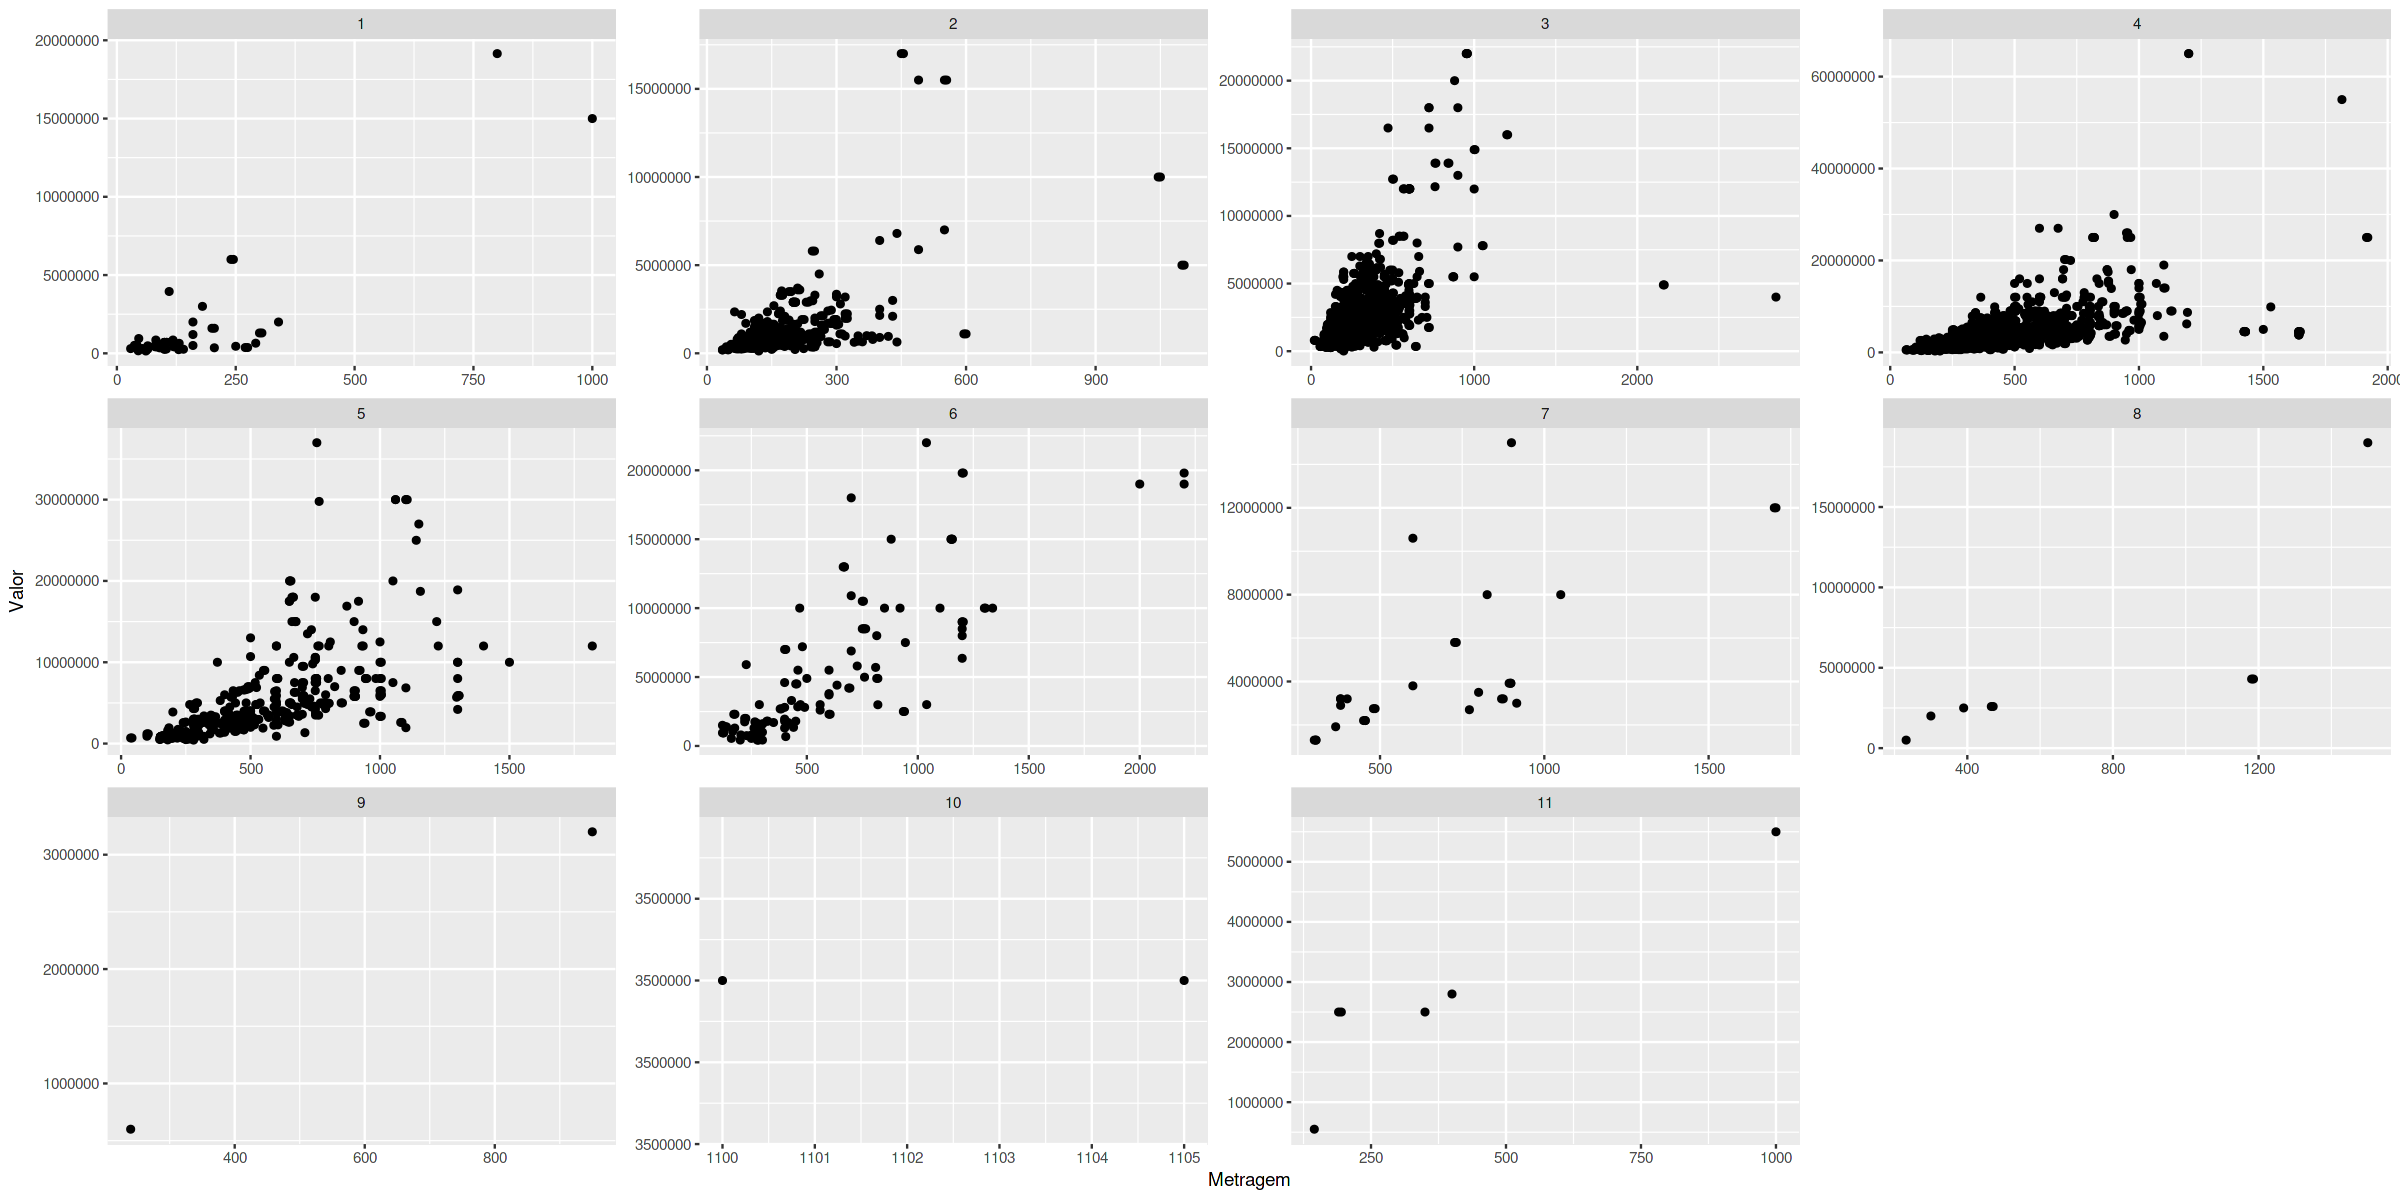

In [26]:
tamanho_grafico <- function(largura, altura){
     options(repr.plot.width = largura, repr.plot.height = altura)
}

tamanho_grafico(20,10)

dados_completo_limpo %>%
    ggplot(aes(Metragem, Valor))+
    geom_point()+
    facet_wrap(~Quartos, scales = "free")

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

Warning message:
“Removed 308 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 308 rows containing missing values (geom_point).”


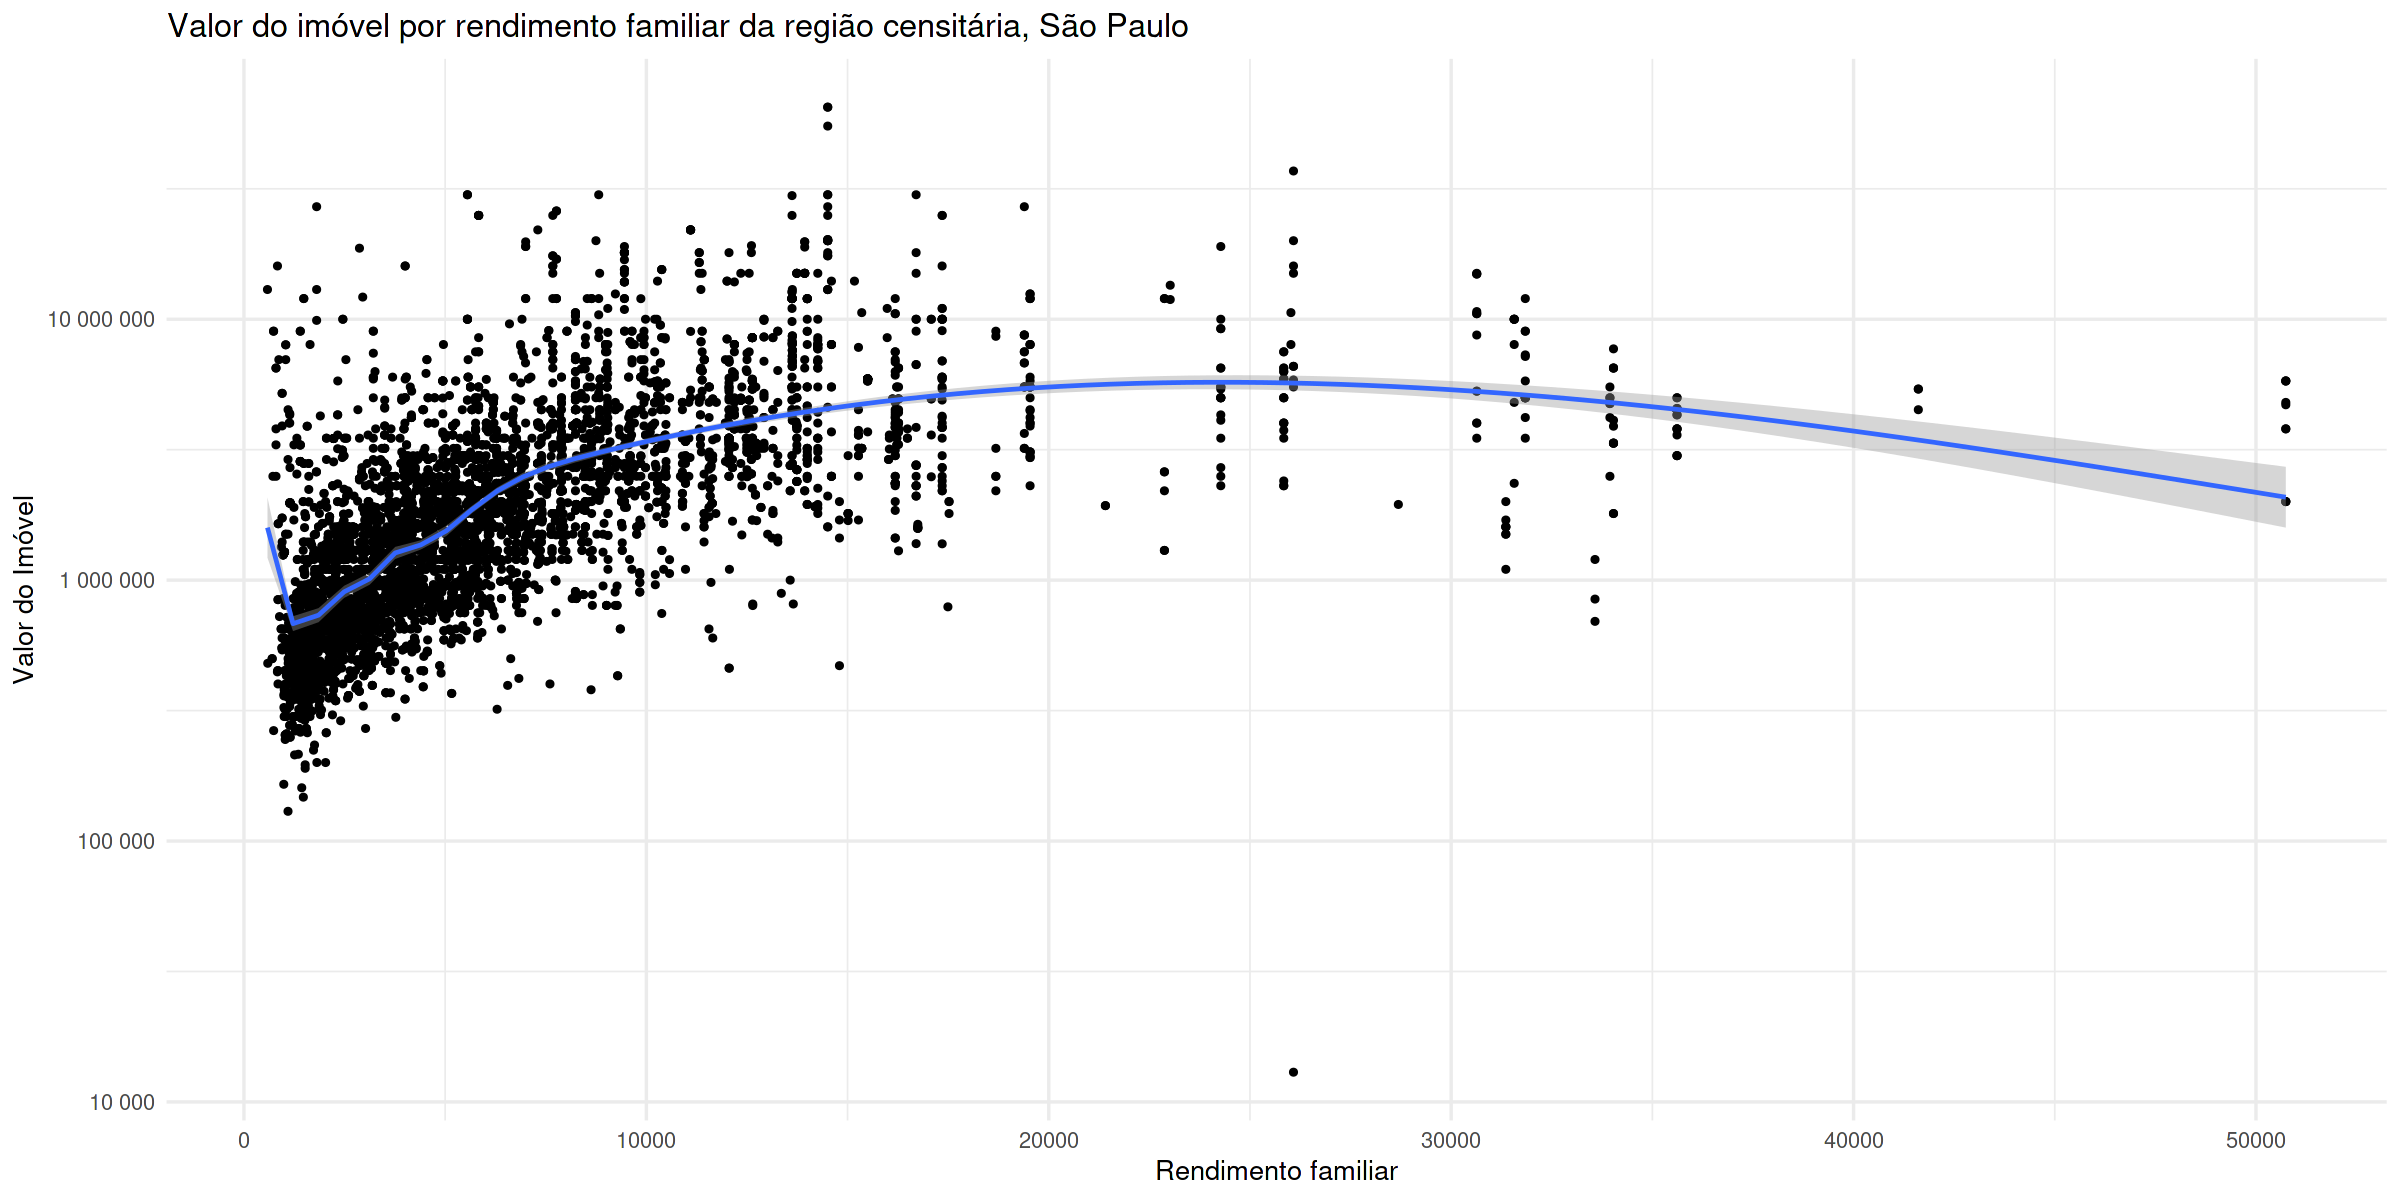

In [27]:
dados_completo %>%
    ggplot(aes(rendimento, Valor))+
    geom_point()+
    geom_smooth()+
    scale_y_log10(labels = scales::label_number())+
    xlab("Rendimento familiar")+
    ylab("Valor do Imóvel")+
    ggtitle("Valor do imóvel por rendimento familiar da região censitária, São Paulo")+
    theme_minimal(base_size = 16)
    

# Aula 4 - Missão Impossivel: Cruzando bases de Dados

## Desafios desta aula
1. Realizar uma análise dos dados do IBGE por mapa, analisando a distribuição de renda.

1. Repassar a aula para entender melhor o que foi realizado.

1. Aprofundar a análise entre dados de vendas e renda.

1. Realizar a análise exploratória e encontrar variáveis relevantes para solução do problema.

Podemos observar o nível de correlação entre as variáveis numéricas por meio de um mapa de calor

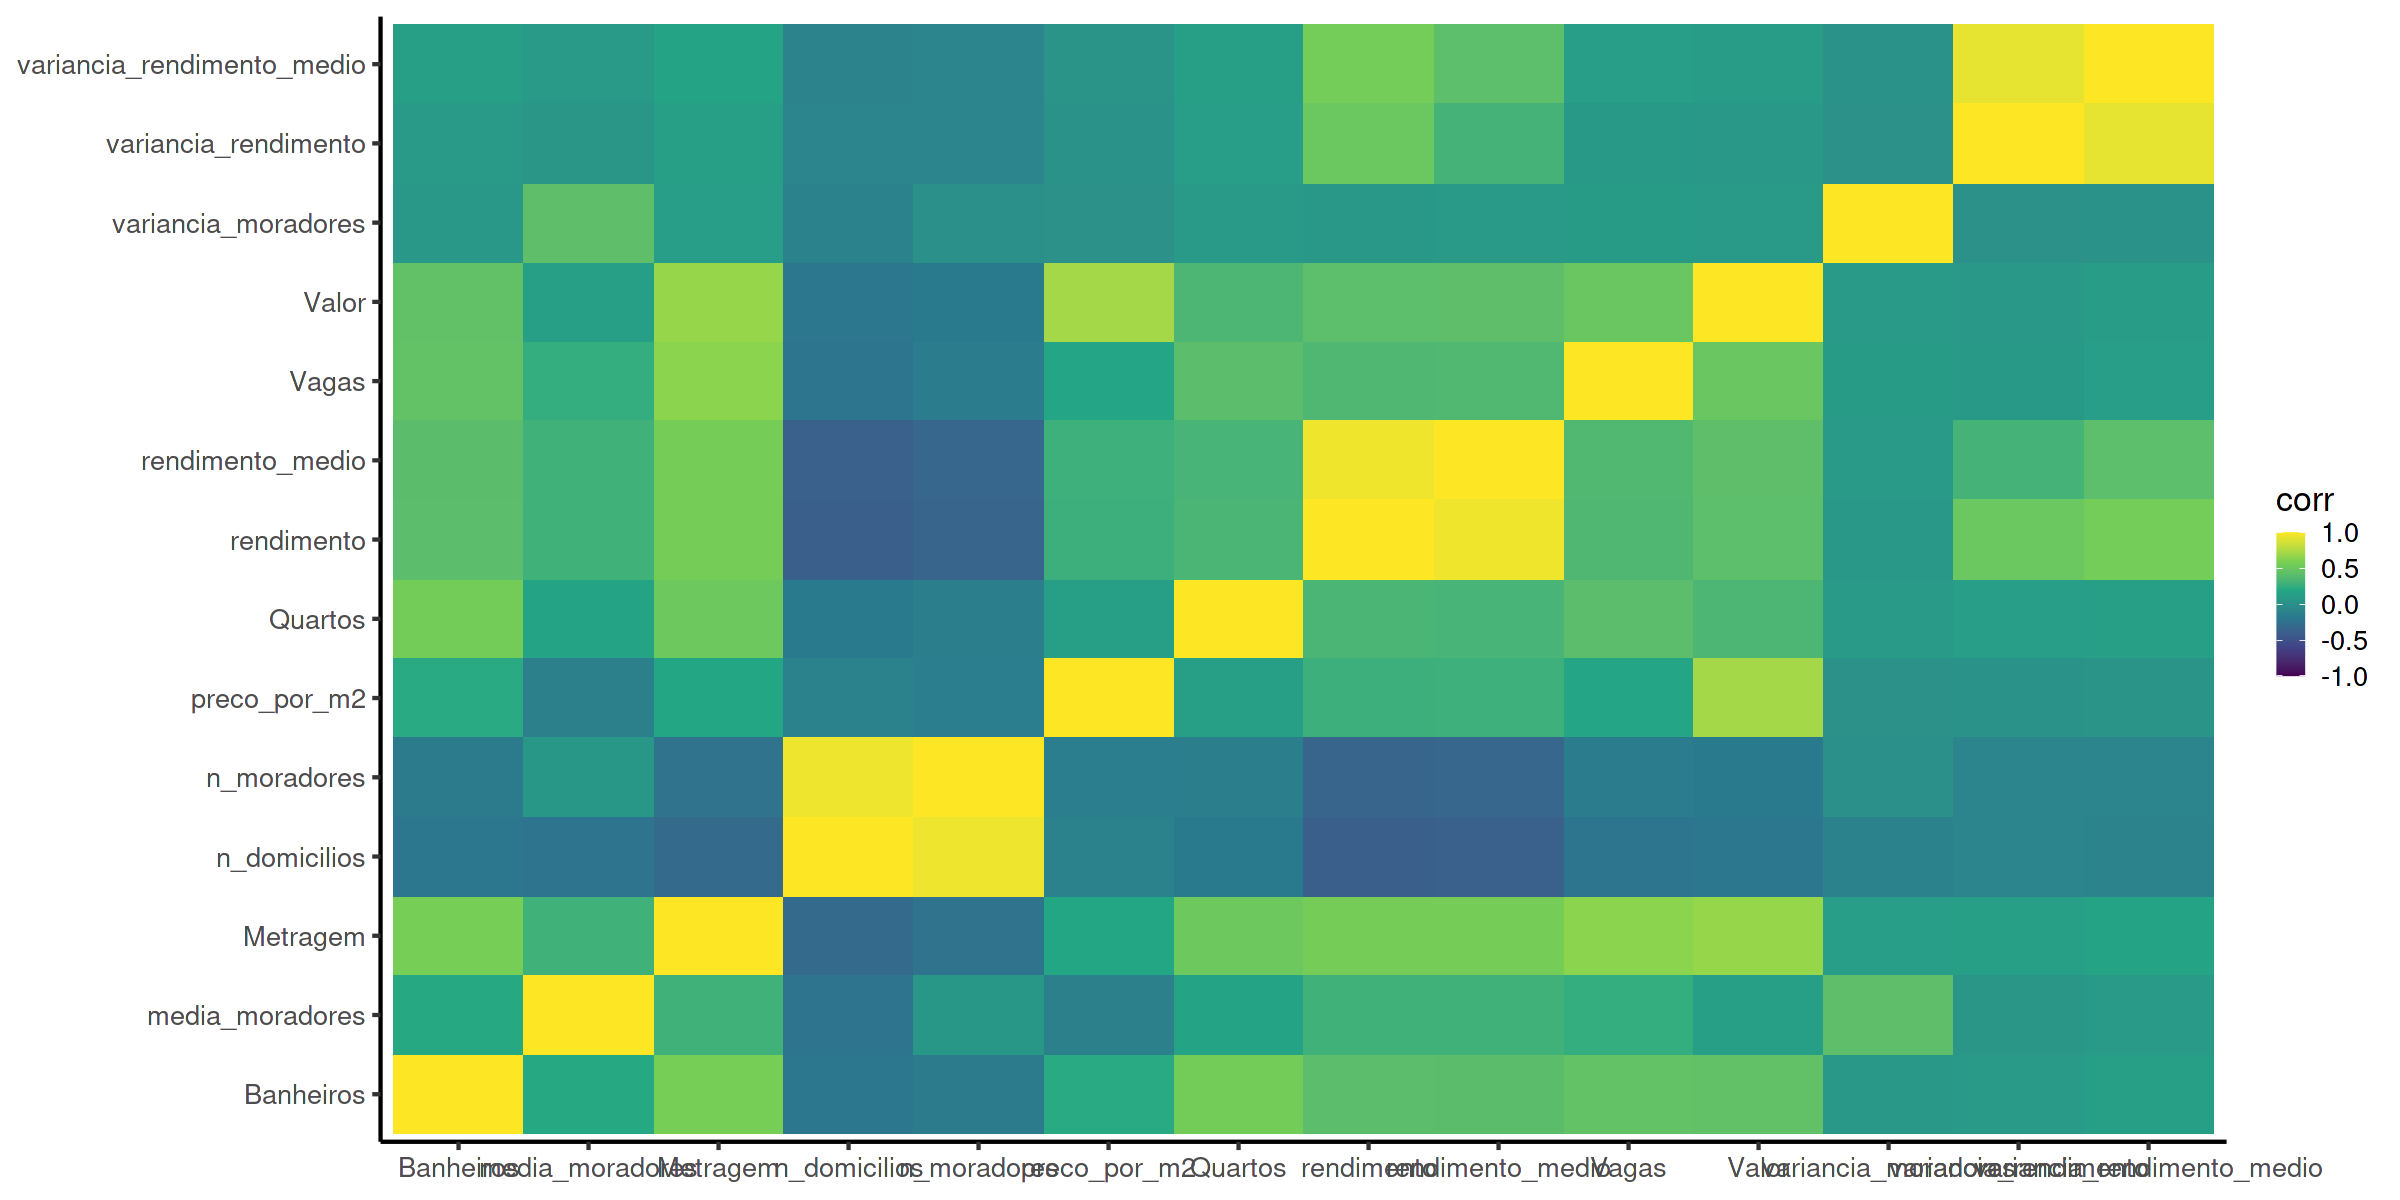

In [28]:
dados_completo_limpo %>%
    select(where(is.numeric)) -> dados_numericos

    correlacoes <- 
cor(as.matrix(drop_na(dados_numericos)))%>%
    data.frame()%>%
    mutate(col1 = rownames(.))%>%
    pivot_longer(-col1, names_to = "col2", values_to = "corr")

    correlacoes %>%
    ggplot(aes(col1, col2, fill = corr))+
    geom_tile()+
    xlab(NULL)+
    ylab(NULL)+
    theme_classic(base_size = 20)+
    scale_fill_continuous(type = "viridis", limits = c(-1,1))

In [29]:
correlacoes %>%
    distinct(corr, .keep_all = TRUE)%>% #elimina pares com correlacao identica (ex, banheiros e metragem, metragem e banheiros)
    filter(col1 != col2, corr > .3 | corr < -.3, #elimina as autocorrelacoes e os dados sem correlacao
            col1 == "Valor"  | col2 == "Valor") %>% #seleciona correlacoes com a variavel de interesse
    arrange(desc(corr))

col1,col2,corr
<chr>,<chr>,<dbl>
Valor,preco_por_m2,0.7131712
Metragem,Valor,0.6729112
Vagas,Valor,0.4960981
Banheiros,Valor,0.4436573
Valor,rendimento_medio,0.4220201
Valor,rendimento,0.4172219
Quartos,Valor,0.3417461


# Aula 5 - Machine Learning

Vamos começar a predição com um modelo simples e interpretável, a regressão linear, usando as variáveis que parecem promissoras de acordo com o nível de correlação.<br>
Primeiro dividimos os dados em treino e teste.

In [30]:
set.seed(123)
dados_completo_limpo$index <- 1:nrow(dados_completo_limpo)
treino <- slice_sample(dados_completo_limpo, n = round(.8*nrow(dados_completo_limpo)))
teste <- dados_completo_limpo %>% slice(-pull(treino, index))

In [31]:

modelo_linear <- lm(Valor ~ Metragem + Vagas + Banheiros + rendimento_medio + Quartos, data = treino)
broom::tidy(summary(modelo_linear))

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-635119.81522,134464.81084,-4.723316,0.00000238981669736959592191213354317458339437507675029337406158447265625000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
Metragem,8372.36127,237.44083,35.260832,0.00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000039172
Vagas,113734.35158,19870.04532,5.723910,0.00000001107520567178657094943611288078225141084942606539698317646980285644531250000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
Banheiros,179032.96118,26472.69177,6.762930,0.00000000001522503311378257462164567697147183819583737829361780313774943351745605468750000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
rendimento_medio,35.22154,8.70524,4.046016,0.00005295640339255698055649299038627475511020747944712638854980468750000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
Quartos,-203681.33203,45901.75145,-4.437332,0.00000932228734383442742526554997128940271977626252919435501098632812500000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000


Agora vamos usar o modelo para estimar o valor do imóvel de acordo com as variáveis que selecionamos

In [32]:
broom::augment(modelo_linear, newdata = teste, type.predict = "response") %>%
    select(Valor_real = Valor, Valor_estimado = .fitted) -> previsoes_linear

Vamos avaliar algumas métricas de performance:
#### Erro médio absoluto (MAE): é a distância média das nossas previsões para a realidade
#### Erro quadrático médio (MSE): similar ao MAE mas em vez de tomar o absoluto das diferenças entre as observações previstas e reais, eleva essa distância ao quadrado. Dessa forma, penaliza erros mais altos.

In [33]:
previsoes_linear %>%
    mutate(erro = Valor_real - Valor_estimado) %>%
    summarize(MAE = mean(abs(erro)), MSE = mean(erro^2))

MAE,MSE
<dbl>,<dbl>
1234160,7737023208596


Como os valores são muito grandes, fica difícil interpretar quantidades absolutas. Vamos ver como nos saímos no erro médio absoluto percentual.

In [34]:
Metrics::mape(previsoes_linear$Valor_real, previsoes_linear$Valor_estimado)

[1] 0.5495562

Vemos que esse modelo teve um erro muito alto. Isso provavelmente se deve a estarmos modelando uma resposta não linear com um modelo linear. Precisamos de uma abordagem mais flexível (com menor viés).

Primeiro treinamos o modelo de Random Forest, que é mais flexível

In [35]:
#treinar o modelo
modelo_rf <- randomForest::randomForest(Valor ~ Metragem + Vagas + Banheiros + rendimento_medio + Quartos, data = treino)

Depois fazemos as previsões com base no dataset de teste e reavaliamos as métricas

In [36]:
previsoes_rf <- predict(modelo_rf, newdata = teste)

MAE <- Metrics::mae(previsoes_rf, teste$Valor)
MSE <- Metrics::mse(previsoes_rf, teste$Valor)
MAPE <- Metrics::mape(previsoes_rf, teste$Valor)

cat("MAE:", MAE, "\n", "MSE:", MSE, "\n", "MAPE:", MAPE)

MAE: 933326.2 
 MSE: 4925878997614 
 MAPE: 0.3190886

O uso desse modelo conseguiu reduzir o erro percentual médio em 20%! Podemos ainda aplicar outras técnicas de feature engineering para melhorar ainda mais a performance do modelo no futuro.